<a href="https://colab.research.google.com/github/sharifashik591/HandDigit-recognition-with_DeepLearning/blob/main/Model_tuning_with_Hand_Digit_Recognition_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load dependences

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from  sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

Load digit recognition Dataset from sklearn

In [2]:
from sklearn import datasets
dataset=datasets.load_digits()

In [3]:
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Define features and target dataset

In [4]:
features=dataset.images
target=dataset.target

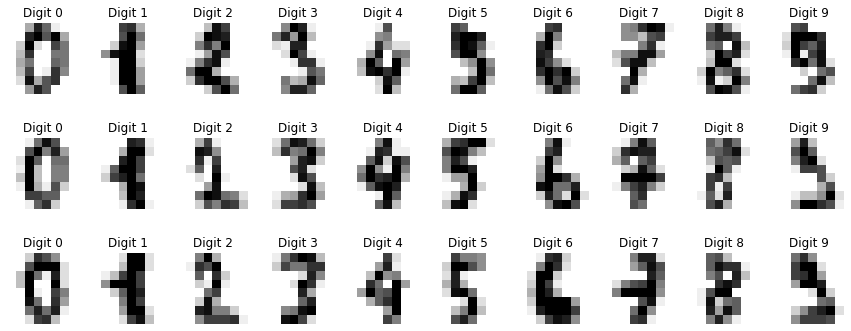

In [5]:
fig,axes=plt.subplots(3,10, figsize=(15,6))

for ax,img,num in zip(axes.ravel(),features,target):
  ax.axis('off')
  ax.imshow(img, cmap=plt.cm.gray_r)
  ax.set_title('Digit '+str(num))

In [6]:
print(features.shape)
print(target.shape)

(1797, 8, 8)
(1797,)


We see that features data contains 3 dimensions, Here is 1797 isntances and each instanch are 8 by 8 pixels big. To classify on this features data we have to flatten the images, Turning each 2-D array shape (8, 8) into shape (64,) .

In [7]:
reshaped_features=features.reshape((len(features),-1))

In [8]:
print('Before reshping features shape is',features.shape)
print('After reshping features shape is',reshaped_features.shape)

Before reshping features shape is (1797, 8, 8)
After reshping features shape is (1797, 64)


## Step 1

Separate data into train and test set

In [9]:
x_train,x_test,y_train,y_test=train_test_split(reshaped_features, target, stratify=target, test_size=0.2)

In [10]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [12]:
default_score=[] #store all default classifier accuracy

### Support vector machine (SVM)

In [13]:
from sklearn import svm

In [14]:
# Default SVM 
svm_clf=svm.SVC()
svm_model=svm_clf.fit(x_train,y_train)
pred_svm=svm_model.predict(x_test)
acc_svm=accuracy_score(y_test,pred_svm)
print('Default SVM accuracy is',acc_svm*100)
default_score.append({'SVM':acc_svm})


Default SVM accuracy is 98.88888888888889


Cross validation on SVM

In [15]:
gama_range=[]
for i in range(-5,5):
  gama=10**i
  gama_range.append(gama)

In [16]:
svm_score=[]
for i in gama_range:
  svm_clf=svm.SVC(C=i,kernel='rbf')
  scores=cross_val_score(svm_clf,reshaped_features,target,cv=5,scoring='f1_macro')
  # print(cross_val_score(svm_clf,reshaped_features,target,cv=5,scoring='f1_macro'))
  max_score=scores[np.argmax(scores)]
  print(max_score)
  svm_score.append({i:max_score})


0.06778073717673341
0.06778073717673341
0.06778073717673341
0.10616539291163059
0.9748810593821119
0.9888360653670434
0.9888857589984351
0.9888857589984351
0.9888857589984351
0.9888857589984351


In [17]:
print("Accuracy Per C value is ")
svm_score

Accuracy Per C value is 


[{1e-05: 0.06778073717673341},
 {0.0001: 0.06778073717673341},
 {0.001: 0.06778073717673341},
 {0.01: 0.10616539291163059},
 {0.1: 0.9748810593821119},
 {1: 0.9888360653670434},
 {10: 0.9888857589984351},
 {100: 0.9888857589984351},
 {1000: 0.9888857589984351},
 {10000: 0.9888857589984351}]

### K-Nearest Neighbor(KNN) 

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Default KNN
knn_clf = KNeighborsClassifier()
knn_model=knn_clf.fit(x_train, y_train)
pred_knn = knn_model.predict(x_test)
acc_knn=accuracy_score(y_test,pred_knn)
print(acc_knn)
default_score.append({'KNN':acc_knn})


0.9805555555555555


Cross validation on KNN

In [20]:
k_value=[1,3,5,7,9]
knn_score=[]

for n in k_value:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_scores=cross_val_score(knn_clf,reshaped_features,target,cv=5,scoring='f1_macro')
    max_score=knn_scores[np.argmax(knn_scores)]
    # print(max_score)
    knn_score.append({n:max_score})


In [21]:
print("Accuracy Per k values is ")
knn_score

Accuracy Per k values is 


[{1: 0.9860965760616709},
 {3: 0.9831551205732408},
 {5: 0.9803783605113965},
 {7: 0.9804113208213376},
 {9: 0.9774616601217975}]

### Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# default Decision Trees 

DT_clf=DecisionTreeClassifier()
dt_model=DT_clf.fit(x_train,y_train)
pred_dt=dt_model.predict(x_test)
acc_dt=accuracy_score(y_test,pred_dt)
print(acc_dt)
default_score.append({'Decision Trees':acc_dt})

0.8694444444444445


Cross validation on Decision Trees 

In [24]:
dt_score=[]
min_split_value=[3,5,7,9]

for i in min_split_value:
  DT_clf=DecisionTreeClassifier(min_samples_split=i)
  DT_scores=cross_val_score(DT_clf,reshaped_features,target,cv=5,scoring='f1_macro')
  # print(DT_scores)
  max_dt=DT_scores[np.argmax(DT_scores)]
  print(max_dt)
  dt_score.append({i:max_dt})



0.8606714472806392
0.8426454970214351
0.8297881868890566
0.8247337261099377


In [25]:
print("Accuracy Per min_samples_split value is ")
dt_score

Accuracy Per min_samples_split value is 


[{3: 0.8606714472806392},
 {5: 0.8426454970214351},
 {7: 0.8297881868890566},
 {9: 0.8247337261099377}]

### LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# default LogisticRegression
lr_clf=LogisticRegression()
lr_model=lr_clf.fit(x_train,y_train)
pred_lr=lr_model.predict(x_test)
acc_lr=accuracy_score(y_test,pred_lr)
default_score.append({'LogisticRegression':acc_lr})


In [28]:
print(acc_lr)

0.9472222222222222


Cross validation on LogisticRegression

In [29]:
gama_range=[]
for i in range(-5,5):
  gama=10**i
  gama_range.append(gama)

In [30]:
lr_score=[]

for i in gama_range:
  lr_clf=LogisticRegression(penalty='l1',C=i,solver='liblinear') # l1 is supported by solver 'liblinear'
  LR_scores=cross_val_score(lr_clf,reshaped_features,target,cv=5,scoring='f1_macro')
  max_lr=LR_scores[np.argmax(LR_scores)]
  print(max_lr)
  lr_score.append({i:max_lr})



0.018227848101265823
0.018227848101265823
0.7948894448590822
0.9359408115260441
0.9634775753653981
0.9609867840609814
0.9527050729015633
0.9501131986933059
0.9555142616789892
0.955442231902734


In [31]:
print("Accuracy Per C value is ")
lr_score

Accuracy Per C value is 


[{1e-05: 0.018227848101265823},
 {0.0001: 0.018227848101265823},
 {0.001: 0.7948894448590822},
 {0.01: 0.9359408115260441},
 {0.1: 0.9634775753653981},
 {1: 0.9609867840609814},
 {10: 0.9527050729015633},
 {100: 0.9501131986933059},
 {1000: 0.9555142616789892},
 {10000: 0.955442231902734}]

## Step 2

In [33]:
from sklearn.model_selection import GridSearchCV

### Support vector machine (SVM)

In [45]:
param_grid={
    'C':gama_range,
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
svm_clf=svm.SVC()
svm_grid=GridSearchCV(estimator=svm_clf,param_grid=param_grid,n_jobs=-1)
svm_grid.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
print('Best parameter for SVM is below',svm_grid.best_params_)
print('SVM tuned validation accuracy = ',svm_grid.best_score_)
print('SVM final test set accuracy = ',svm_grid.score(x_test,y_test))

Best parameter for SVM is below {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVM tuned validation accuracy =  0.9930434572202864
SVM final test set accuracy =  0.9861111111111112


### KNeighborsClassifier

In [36]:
param_grid={
      'n_neighbors':[1,3,5,7,9]
}
knn_clf = KNeighborsClassifier()
knn_grid=GridSearchCV(estimator=knn_clf,param_grid=param_grid,n_jobs=-1)

In [37]:
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
print('Best parameter for KNN is below',knn_grid.best_params_)
print('KNN tuned validation accuracy = ',knn_grid.best_score_)
print('KNN final test set accuracy = ',knn_grid.score(x_test,y_test))

Best parameter for KNN is below {'n_neighbors': 5}
KNN tuned validation accuracy =  0.9867789392179637
KNN final test set accuracy =  0.9805555555555555


### DecisionTreeClassifier

In [39]:
param_grid={
      'min_samples_split':[3,5,7,9]
}

dt_clf=DecisionTreeClassifier()
dt_grid=GridSearchCV(estimator=dt_clf,param_grid=param_grid,n_jobs=-1)
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': [3, 5, 7, 9]},
             pre

In [40]:
print('Best parameter for Decision Tree is below',dt_grid.best_params_)
print('Decision Tree tuned validation accuracy = ',dt_grid.best_score_)
print('Decision Tree final test set accuracy = ',dt_grid.score(x_test,y_test))

Best parameter for Decision Tree is below {'min_samples_split': 5}
Decision Tree tuned validation accuracy =  0.8461938637243515
Decision Tree final test set accuracy =  0.8472222222222222


### LogisticRegression

In [41]:
param_grid={
    'C':gama_range, #gama_range already defined above
    'penalty':['l1'],
    'solver':['liblinear']
}
lr_clf=LogisticRegression()
lr_grid=GridSearchCV(estimator=lr_clf,param_grid=param_grid,n_jobs=-1)


In [42]:
lr_grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
print('Best parameter for LogisticRegression is  ',lr_grid.best_params_)
print('LogisticRegression tuned validation accuracy = ',lr_grid.best_score_)
print('LogisticRegression final test set accuracy = ',lr_grid.score(x_test,y_test))

Best parameter for LogisticRegression is   {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression tuned validation accuracy =  0.9617160278745643
LogisticRegression final test set accuracy =  0.9722222222222222


In [44]:
default_score

[{'SVM': 0.9888888888888889},
 {'KNN': 0.9805555555555555},
 {'Decision Trees': 0.8694444444444445},
 {'LogisticRegression': 0.9472222222222222}]

In [48]:
print('Hyperparameter for each Classification is below ')
print('LogisticRegression ',svm_grid.best_params_)
print('LogisticRegression ',knn_grid.best_params_)
print('Decision Tree ',dt_grid.best_params_)
print('LogisticRegression ',lr_grid.best_params_)

Hyperparameter for each Classification is below 
LogisticRegression  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
LogisticRegression  {'n_neighbors': 5}
Decision Tree  {'min_samples_split': 5}
LogisticRegression  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


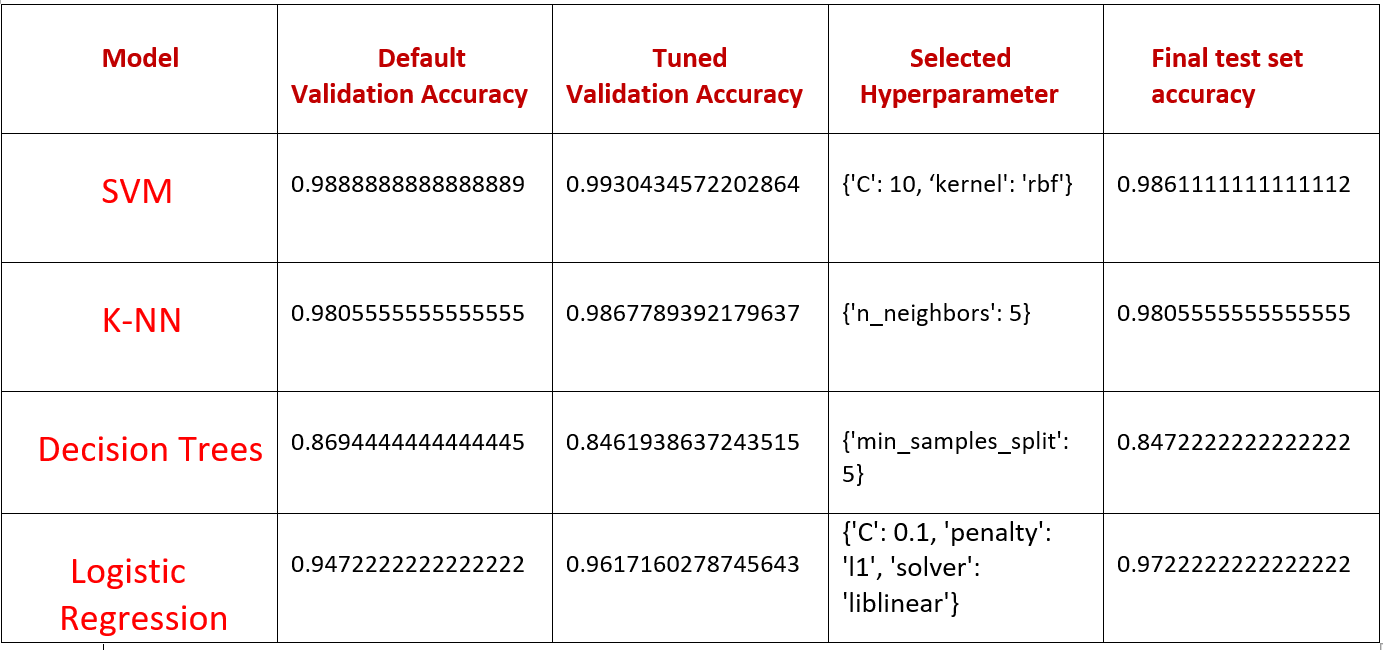